## Approximating the Tail Probability of a Quadratic Form of a Multivariate Normal
Consider the problem where we have a multivariate normal $\mathbf{x}$ with mean vector $\mu_{\mathbf{x}}$ and covariance matrix $\Sigma_{\mathbf{x}}$. Now let $A$ be some positive semidefinite matrix and define the following random variable which we will call a Multivariate Normal Quadratic Form (MVNQF):
$$Q:= \mathbf{x}^TA\mathbf{x}$$
In this notebook, we address the problem of how can we compute the tail probability:
$$\mathbb{P}(Q > t)$$
Note that being able to compute this probability is useful for the uncontrolled agent risk assesment problem. In some works, a deep net is used to produce Gaussian Mixture Models of the positions of the cars. The mixture components are essentially bivariate normals of position, let's call one $\mathbf{p}$. If we draw an ellipse around our ego vehicle that is parameterized by a matrix $Q$ and a constant $c$, then the probability of that other car entering the ellipse around our car is simply:
$$\mathbb{P}(\mathbf{p}^TQ\mathbf{p}\leq c)$$
Essentially, the CDF of a MVNQF. This is actually non-trivial to compute in general, and there does not appear to be any known analytic expressions of this CDF (this is an expression as a weighted infinite series of Chi squared CDFs however...). In this Jupyter notebook, we essentially evaluate how good this approach is http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.421.5737&rep=rep1&type=pdf.

In [17]:
import numpy as np
from mvn_quad_form import MvnQuadForm, compute_ck
import time
from scipy import random, linalg
from data_generator import *

# Generate these many random MVNQFs
n_random_variables = 20
# For each generated MVNQF, evaluate it at these t values
ts = np.linspace(5.0, 100.0, 20)
n = 2 # Dimensionality of the MVNQF to generate
approximated_vals = []
monte_carlo_vals = []
for i in range(n_random_variables):
    mvnqf = generate_random_MVNQF(n)
    for t in ts:
        approximated_vals.append(mvnqf.upper_tail_probability(t))
        monte_carlo_vals.append(mvnqf.upper_tail_probability_monte_carlo(t,n_samples = 1e6))

Text(0.5, 1.0, "Error in Prob(Q > t) Where Q = x'Ax for Some Correlated Bivariate Normal x")

Text(0, 0.5, 'Approximated - True Probability (Fractional)')

Text(0.5, 0, 'Random Experiment Number')

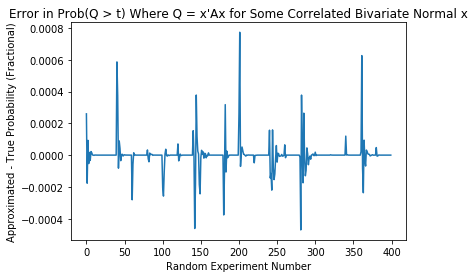

In [18]:
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

absolute_error = [aval - mcval for aval, mcval in zip(approximated_vals, monte_carlo_vals)]
plt.plot(absolute_error)
plt.title("Error in Prob(Q > t) Where Q = x'Ax for Some Correlated Bivariate Normal x")
plt.ylabel("Approximated - True Probability (Fractional)")
plt.xlabel("Random Experiment Number")
plt.show()